## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df=pd.merge(mouse_metadata, study_results, on ='Mouse ID', how='right')
# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [2]:
# Checking the number of mice.
mousecount = len (mousestudy_df['Mouse ID'].drop_duplicates())
mousecount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_df['combined']=mousestudy_df['Mouse ID'] + mousestudy_df['Timepoint'].astype(str)
mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combined
0,b128,Capomulin,Female,9,22,0,45.000000,0,b1280
1,b128,Capomulin,Female,9,22,5,45.651331,0,b1285
2,b128,Capomulin,Female,9,22,10,43.270852,0,b12810
3,b128,Capomulin,Female,9,22,15,43.784893,0,b12815
4,b128,Capomulin,Female,9,22,20,42.731552,0,b12820
...,...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1,m60125
1889,m601,Capomulin,Male,22,17,30,31.758275,1,m60130
1890,m601,Capomulin,Male,22,17,35,30.834357,1,m60135
1891,m601,Capomulin,Male,22,17,40,31.378045,1,m60140


In [4]:
duplicatemouseid=mousestudy_df.loc[mousestudy_df.duplicated(subset=["Mouse ID", 'Timepoint']),'Mouse ID']
duplicatemouseid

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [5]:
mousestudy2=mousestudy_df[mousestudy_df['Mouse ID'].isin(duplicatemouseid)==False]
len(mousestudy2['Mouse ID'].unique())

248

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mousestudy2=mousestudy_df.drop_duplicates(subset=['combined'])

In [7]:
#mousecount2=len(mousestudy2['Mouse ID'].drop_duplicates())
#mousecount2

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mousecount = len (mousestudy2['Mouse ID'].drop_duplicates())
#mousecount

In [10]:
# Checking the number of mice in the clean DataFrame.
mousestudy2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combined
0,b128,Capomulin,Female,9,22,0,45.000000,0,b1280
1,b128,Capomulin,Female,9,22,5,45.651331,0,b1285
2,b128,Capomulin,Female,9,22,10,43.270852,0,b12810
3,b128,Capomulin,Female,9,22,15,43.784893,0,b12815
4,b128,Capomulin,Female,9,22,20,42.731552,0,b12820
...,...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1,m60125
1889,m601,Capomulin,Male,22,17,30,31.758275,1,m60130
1890,m601,Capomulin,Male,22,17,35,30.834357,1,m60135
1891,m601,Capomulin,Male,22,17,40,31.378045,1,m60140


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor1=mousestudy2[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor2 = tumor1.groupby(['Drug Regimen'])
tumormean = (tumor2.mean())
tumormean =tumormean.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume Mean'})
tumor3=mousestudy2[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor4 = tumor3.groupby(['Drug Regimen'])
tumormedian = (tumor4.median())
tumormedian =tumormedian.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume Median'})
tumorjoin1=pd.merge(tumormean, tumormedian, on = 'Drug Regimen', how='inner')
variance=mousestudy2.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std=mousestudy2.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem=mousestudy2.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

pddf=pd.DataFrame({'Variance':variance, 'Standard Deviation':std, 'SEM':sem})
Stats=pd.merge(tumorjoin1, pddf, on ='Drug Regimen', how='inner')
Stats


#tumor5=mousestudy_df[['Drug Regimen', 'Tumor Volume (mm3)']]
#tumormode = tumor5.mode()
#tumormode = sts.mode(tumor5('Tumor Volume (mm3)'))

#tumor5=sts.mode(tumor1['Tumor Volume (mm3)'])
#tumor5=(tumor1['Tumor Volume (mm3)'].mode())
#mode_scipy = sts.mode(temperatures)
#tumorjoin1
#tumormode

,Tumor Volume Mean,Tumor Volume Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary=mousestudy2.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':["mean", "median", "var", "std", 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line
Summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

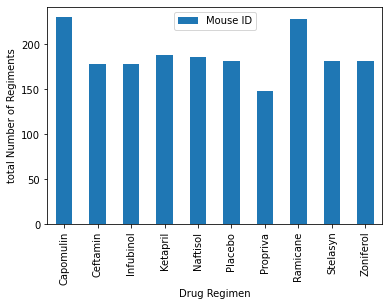

<Figure size 432x288 with 0 Axes>

In [30]:
treat=mousestudy2[['Drug Regimen', 'Mouse ID']]
treatment1 = treat.groupby(['Drug Regimen'])
treatment = (treatment1.count())
treatment
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_chart = treatment.plot(kind='bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('total Number of Regiments')
plt.show()
plt.tight_layout()

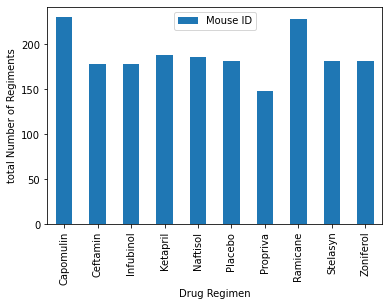

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_chart = treatment.plot(kind='bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('total Number of Regiments')
plt.show()
plt.tight_layout()


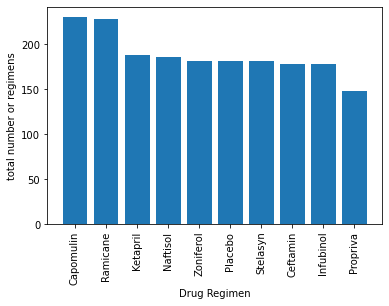

In [35]:
count=mousestudy2['Drug Regimen'].value_counts()
plt.bar(count.index.values,count.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('total number or regimens')
plt.show()


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf=mousestudy2[['Drug Regimen', 'Sex']]
sex1 = mf.groupby(['Sex'])
sex = (sex1.count())
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.05)
labels=['Female', 'Male']
sex

,Drug Regimen
Sex,
Female,922
Male,958


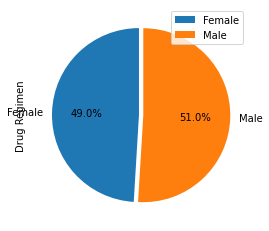

In [41]:
sex.plot(kind='pie', explode=explode, autopct='%1.1f%%', subplots=True, startangle=90)
plt.show()

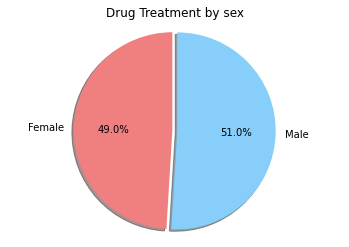

In [16]:
plt.title('Drug Treatment by sex')
plt.pie(sex['Drug Regimen'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

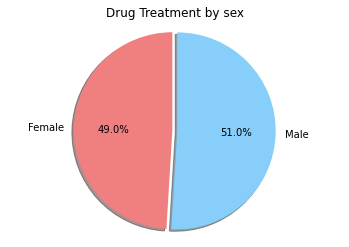

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Drug Treatment by sex')
plt.pie(sex['Drug Regimen'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Camp=mousestudy2.loc[mousestudy2['Drug Regimen']=='Capomulin']
Rami=mousestudy2.loc[mousestudy2['Drug Regimen']=='Ramicane']
Infu=mousestudy2.loc[mousestudy2['Drug Regimen']=='Infubinol']
Ceft=mousestudy2.loc[mousestudy2['Drug Regimen']=='Ceftamin']

Camp2 = Camp.groupby(['Mouse ID'])['Timepoint'].max()
Rami2 = Rami.loc[Rami['Timepoint']==45.0]
Infu2 = Infu.loc[Infu['Timepoint']==45.0]
Ceft2 = Ceft.loc[Ceft['Timepoint']==45.0]

Results=pd.DataFrame({Camp2, Rami2, Infu2, Ceft2})
Last=Results[['Mouse ID','Drug Regimen', 'Tumor Volume (mm3)']]

#Camp2
# Start by getting the last (greatest) timepoint for each mouse
Last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [53]:
temp=mousestudy2.groupby(['Mouse ID'])['Timepoint'].max()
temp=temp.reset_index()

testmerge=temp.merge(mousestudy2, on=['Mouse ID', 'Timepoint'], how='left')
testmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,combined
0,a203,45,Infubinol,Female,20,23,67.973419,2,a20345
1,a251,45,Infubinol,Female,21,25,65.525743,1,a25145
2,a262,45,Placebo,Female,17,29,70.717621,4,a26245
3,a275,45,Ceftamin,Female,20,28,62.999356,3,a27545
4,a366,30,Stelasyn,Female,16,29,63.440686,1,a36630
...,...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0,z43510
244,z578,45,Ramicane,Male,11,16,30.638696,0,z57845
245,z581,45,Infubinol,Female,24,25,62.754451,3,z58145
246,z795,45,Naftisol,Female,13,29,65.741070,3,z79545


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Volume=[]
for drug in Drugs:
    vol=testmerge.loc[testmerge['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    Volume.append(vol)
    quartiles = vol.quantile([.25, .5, .75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    outliers=vol.loc[(vol<lower_bound)|(vol>upper_bound)]
    print(f'{drug} outliers:{outliers}')
#Volume
    
# Create empty list to fill with tumor vol data (for plotting)
#CeftTumor=Ceft2['Tumor Volume (mm3)']
#CampTumor=Camp2['Tumor Volume (mm3)']


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = CeftTumor.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
#print(f"The lower quartile of Ceftamin is: {lowerq}")
# print(f"The upper quartile of Ceftamin is: {upperq}")
# print(f"The interquartile range of Ceftamin is: {iqr}")
# print(f"The the median of Ceftamin is: {quartiles[0.5]} ")   
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")


Capomulin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


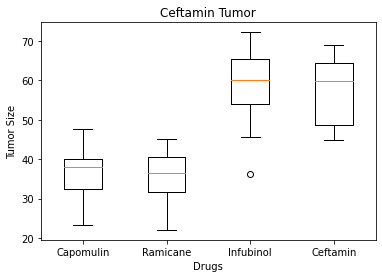

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Tumor')
#ax1.set_xlabel('Drugs')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(Volume, labels=Drugs)
plt.show()

# fig1, ax1 = plt.subplots()
# ax1.set_title('Campomuilin Tumor')
# ax1.set_ylabel('Tumor Size')
# ax1.boxplot(CampTumor)
# plt.show()


## Line and Scatter Plots

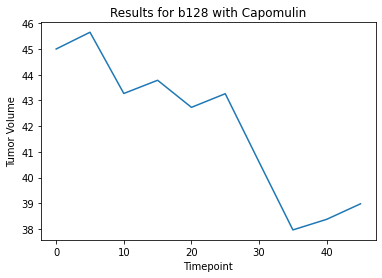

In [21]:
## Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128=Camp.loc[Camp['Mouse ID']=='b128']
x_axis=b128['Timepoint']
points=b128['Tumor Volume (mm3)']

plt.plot(x_axis, points)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Results for b128 with Capomulin')
plt.show()


In [22]:
b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combined
0,b128,Capomulin,Female,9,22,0,45.000000,0,b1280
1,b128,Capomulin,Female,9,22,5,45.651331,0,b1285
2,b128,Capomulin,Female,9,22,10,43.270852,0,b12810
3,b128,Capomulin,Female,9,22,15,43.784893,0,b12815
4,b128,Capomulin,Female,9,22,20,42.731552,0,b12820
5,b128,Capomulin,Female,9,22,25,43.262145,1,b12825
6,b128,Capomulin,Female,9,22,30,40.605335,1,b12830
7,b128,Capomulin,Female,9,22,35,37.967644,1,b12835
8,b128,Capomulin,Female,9,22,40,38.379726,2,b12840
9,b128,Capomulin,Female,9,22,45,38.982878,2,b12845


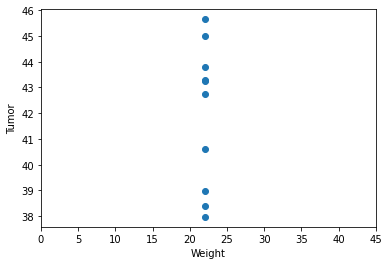

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


weight=b128['Weight (g)']
plt.scatter(weight, points)
plt.xticks(x_axis)
plt.xlabel('Weight')
plt.ylabel('Tumor')
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
